<a href="https://colab.research.google.com/github/Kishankumar1328/Emotion-detection/blob/main/Emotional_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.models import Model
from keras.layers import Flatten,Dense


from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [10]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

!unzip train.zip?dl=0

--2024-02-11 17:08:32--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.83.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.83.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2024-02-11 17:08:33--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc64a1b242dabdbeb581467d30ac.dl.dropboxusercontent.com/cd/0/inline/CNF8dt5s74TmLnb6ojDMqdMdvIIiwXck_9NqJsdB5oer5LjJtEvAyPNIM8Iou19FBPKDJltQZdRR7-qZJICbZb93ib4tRJjOyCVV_SIvDn3cWHDq76W945mxQRI9jDuQbSPgp9DQGhn-UUbonOVZ09oU/file# [following]
--2024-02-11 17:08:34--  https://uc64a1b242dabdbeb581467d30ac.dl.dropboxusercontent.com/cd/0/inline/CNF8dt5s74TmLnb6ojDMqdMdvIIiwXck_9NqJsdB5oer5LjJtEvAyPNIM8Iou19FBPKDJltQZdRR7-qZJICbZb93ib4tRJjOyCVV_SIv

In [11]:
#work with pretrained model
base_model=MobileNet(input_shape=(224,224,3),include_top=False)

for layer in base_model.layers:#To prevent retraining of model!
  layer.trainable=False #every layer trainablety is false

  x=Flatten()(base_model.output)
  x=Dense(units=7,activation='Softmax')(x)
#create our model
  model=Model(base_model.input,x)

In [12]:
model.summary()

Model: "model_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# **Preparing our data using data generator**

In [14]:
train_datagen=ImageDataGenerator(
    zoom_range=0.3,
    shear_range=0.3,
    horizontal_flip=True,
    rescale=1./255
)

train_data=train_datagen.flow_from_directory(directory="/content/train",
                                             target_size=(224,224),
                                             batch_size=32)

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [15]:
val_datagen=ImageDataGenerator(rescale=1/255)

val_data=val_datagen.flow_from_directory(
    directory="/content/train",
    target_size=(244,244),
    batch_size=32
)

Found 350 images belonging to 7 classes.


# **Visualizing the data**

In [16]:
t_img,label=train_data.next()

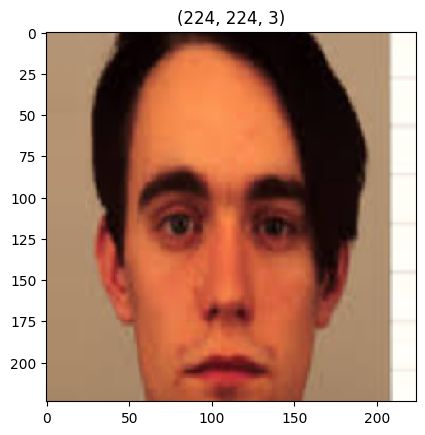

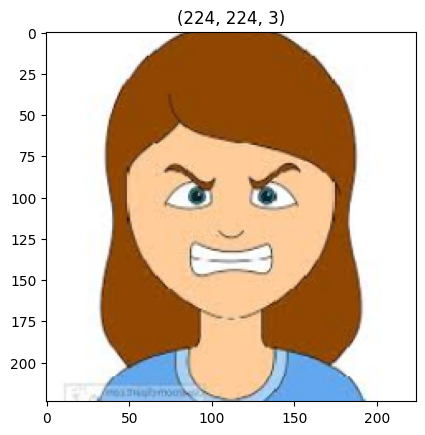

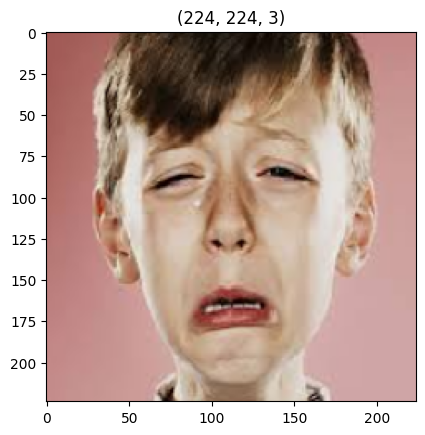

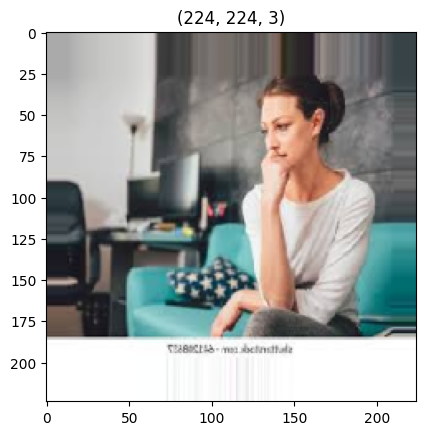

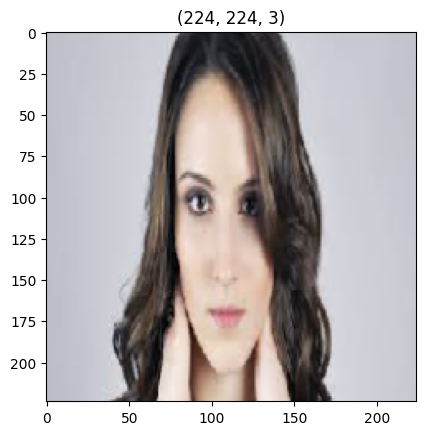

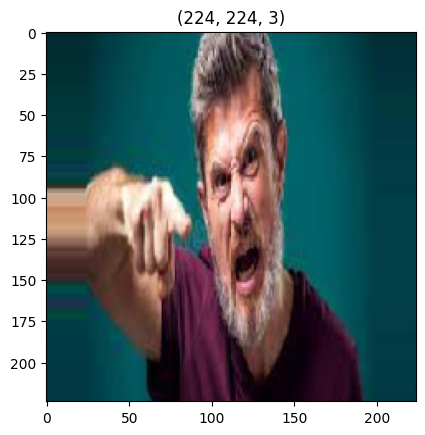

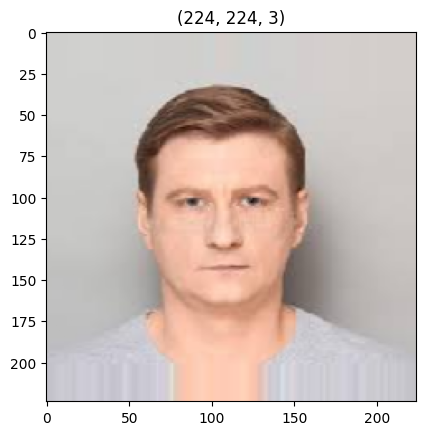

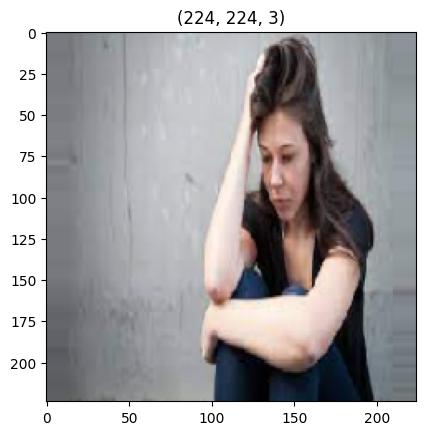

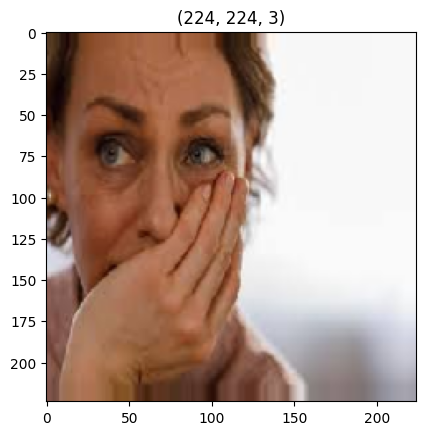

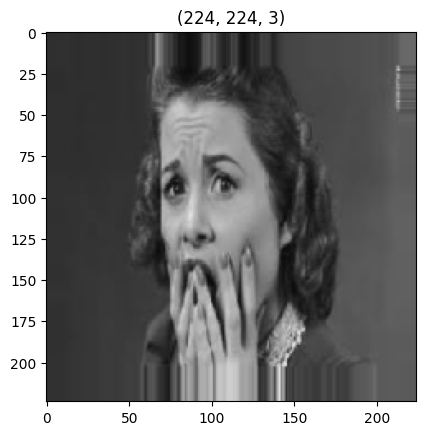

In [17]:
def plotImages(img_arr,label):
  count=0

  for im ,l in zip(img_arr,label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis=False
    plt.show()

    count+=1
    if count==10:
      break


plotImages(t_img,label)

# **Early stopping and model check point**

In [19]:
 from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5,verbose=1,mode='auto')

mc=ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')

call_back=[es,mc]

In [20]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=10,
                         epochs=30,
                         validation_data=val_data,
                         validation_steps=8,
                         callbacks=[es,mc])

<ipython-input-20-946ae87e46cd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 7.8768 - accuracy: 0.2296
Epoch 1: val_accuracy improved from -inf to 0.51172, saving model to best_model.h5
10/10 [==============================] - 33s 3s/step - loss: 7.8768 - accuracy: 0.2296 - val_loss: 4.0761 - val_accuracy: 0.5117


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.7037 - accuracy: 0.5314
Epoch 2: val_accuracy improved from 0.51172 to 0.60938, saving model to best_model.h5
10/10 [==============================] - 39s 4s/step - loss: 3.7037 - accuracy: 0.5314 - val_loss: 2.8989 - val_accuracy: 0.6094
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.4354 - accuracy: 0.6509
Epoch 3: val_accuracy improved from 0.60938 to 0.67188, saving model to best_model.h5
10/10 [==============================] - 38s 4s/step - loss: 2.4354 - accuracy: 0.6509 - val_loss: 2.1872 - val_accuracy: 0.6719
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 2.0796 - accuracy: 0.7594
Epoch 4: val_accuracy improved from 0.67188 to 0.76562, saving model to best_model.h5
10/10 [==============================] - 39s 4s/step - loss: 2.0796 - accuracy: 0.7594 - val_loss: 1.7578 - val_accuracy: 0.7656
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 1.072

In [21]:
from keras.models import load_model

model=load_model("/content/best_model.h5")
model

In [22]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

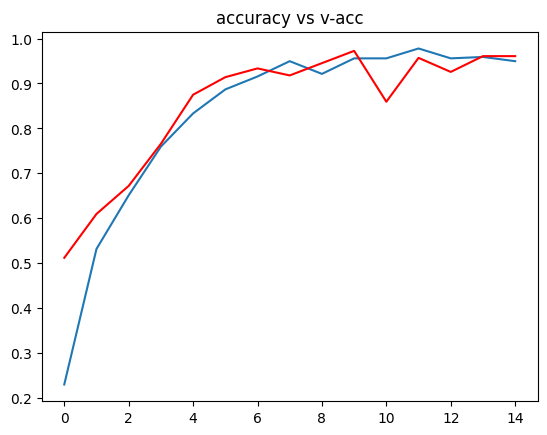

In [23]:
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"],color="red",alpha=1)
plt.title("accuracy vs v-acc")
plt.show()

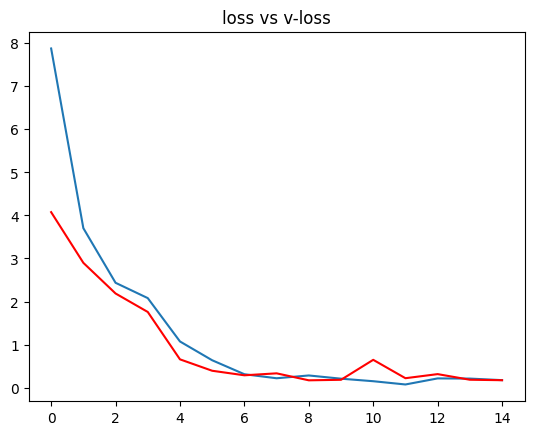

In [24]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],color="red",alpha=1)
plt.title("loss vs v-loss")
plt.show()

In [25]:
op=dict(zip(train_data.class_indices.values(),
            train_data.class_indices.keys()))

1/1 [==============================] - 0s 190ms/step
The image is of Disguist


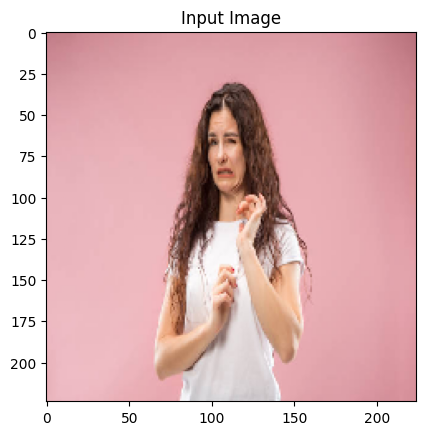

In [27]:
path='/content/istockphoto-1044676028-612x612.jpg'

img=load_img(path,target_size=(224,224))

i=img_to_array(img)/255
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

print(f"The image is of {op[pred]}")

plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()